**NOTE: PLEASE REFER TO THE DATASET USING THIS LINK:**
https://drive.google.com/drive/folders/1abQQCeZ92jGfF2C1GjnJQW8Mw_Jk9cw2

**CHANGE ALL THE FILE PATHS BEFORE EXECUTING THE CODE**

SRNs:

PES1UG21EC302

PES1UG21EC295

PES1UG21EC228


## **1. Convolutional Neural Network Model: Neural network implementation 1**

In [ ]:
import tensorflow as tf
import tensorflow.keras.losses as losses
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras.optimizers as optimizers
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
LOG_DIR = f"{int(time.time())}"
from keras.layers import BatchNormalization
from tempfile import TemporaryFile
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.regularizers as regularizers
import cv2
import random
from PIL import Image
import matplotlib.patches as patches
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from google.colab import drive
import time
drive.mount('/content/drive/')
dataset_dir = "/content/drive/MyDrive/aircraft_image_dataset" # PLEASE CHANGE TO YOUR PATH

training_data = []
test_data = []
RESIZE_VALUE = 130
root_path = "/content/drive/MyDrive/aircraft_image_dataset/" # PLEASE CHANGE TO YOUR PATH

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


<ipython-input-1-f227ba7630f9>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Mounted at /content/drive/


In [ ]:
# outputs the names of the files currently in the google drive file (dataset)
types_path = "/content/drive/MyDrive/aircraft_image_dataset/TYPE-NAMES.txt" #CHANGE PATH TO RESPECTIVE FILE IN DATASET
aircraft_types = []
f = open(types_path, "r")
for types in f.read().split():
  aircraft_types.append(types.replace('"',''))
print(len(aircraft_types))
f.close()
print("Selected aircraft files:",aircraft_types)
print("Files in dataset (Google drive):",os.listdir(root_path))

10
Selected aircraft files: ['B-1', 'B-2', 'B-52', 'C-5', 'C-17', 'C-130', 'C-135', 'E-3', 'KC-10', 'BareLand']
Files in dataset (Google drive): ['BareLand', 'sample', 'training_dataset.npz', 'Model V5', 'B-1', 'B-2', 'B-52', 'C-5', 'C-17', 'C-130', 'C-135', 'E-3', 'KC-10', 'TYPE-NAMES.txt', 'Model V6', 'Model V4', 'Model V3', 'Model V2', 'Model V1', 'Testing Images', 'R - CNN DATASETS', 'primary_training_dataset.npz']


In [ ]:
# to create training data
'''
def create_training_data():
    # function iterates through each file in the google drive dataset and converts each image into an array
  for type in aircraft_types:
    selected_path = root_path + type
    class_num = aircraft_types.index(type)
    for img in os.listdir(selected_path):
      try:
        image = Image.open(os.path.join(selected_path,img))
        img_array = np.array(image)
        aircraft_img = cv2.resize(img_array, (RESIZE_VALUE, RESIZE_VALUE))
        training_data.append([aircraft_img, class_num])
      except Exception as e:
        print("error:",selected_path,image)

create_training_data()
random.shuffle(training_data)
print(len(training_data))
print(training_data[0][1])
plt.imshow(training_data[0][0])
'# saves all generated arrays of images to a .npz file
np.savez_compressed(root_path+'primary_training_dataset1.npz', a=training_data)
'''

In [ ]:
def load_training_data():
  #LOAD TRAINING DATA INTO ARRAY FROM FILE
  loaded = np.load(root_path+"training_dataset.npz", allow_pickle=True) # We have used this .npz file to train our models (included in dataset)
  training_data = loaded['a']
  for x in range(len(training_data)):
    if (training_data[x][0].shape[2] == 4):
      training_data[x][0] = cv2.cvtColor(training_data[x][0], cv2.COLOR_BGRA2BGR)
  return training_data
training_data = load_training_data()
random.shuffle(training_data)
print(len(training_data))

6123


In [ ]:
x_train = []
y_train = []

for data, label in training_data:
  x_train.append(data)
  y_train.append(label)

x_train = np.asarray(x_train)
x_train = np.array(x_train).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
y_train = np.asarray(y_train)

print(len(x_train))


6123


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))


Training samples: 4898
Testing samples: 1225


Epoch 1/30
54/54 [==============================] - 5s 54ms/step - loss: 2.2681 - acc: 0.1660 - val_loss: 2.1621 - val_acc: 0.2034
Epoch 2/30
54/54 [==============================] - 2s 36ms/step - loss: 2.0557 - acc: 0.2701 - val_loss: 1.8900 - val_acc: 0.4252
Epoch 3/30
54/54 [==============================] - 2s 38ms/step - loss: 1.8514 - acc: 0.3524 - val_loss: 1.6582 - val_acc: 0.5007
Epoch 4/30
54/54 [==============================] - 2s 38ms/step - loss: 1.6519 - acc: 0.4507 - val_loss: 1.4473 - val_acc: 0.5857
Epoch 5/30
54/54 [==============================] - 2s 38ms/step - loss: 1.4386 - acc: 0.5312 - val_loss: 1.2235 - val_acc: 0.6395
Epoch 6/30
54/54 [==============================] - 2s 34ms/step - loss: 1.2603 - acc: 0.5942 - val_loss: 1.0682 - val_acc: 0.6830
Epoch 7/30
54/54 [==============================] - 2s 34ms/step - loss: 1.0940 - acc: 0.6383 - val_loss: 0.9471 - val_acc: 0.7286
Epoch 8/30
54/54 [==============================] - 2s 34ms/step - loss: 0.9802 - a

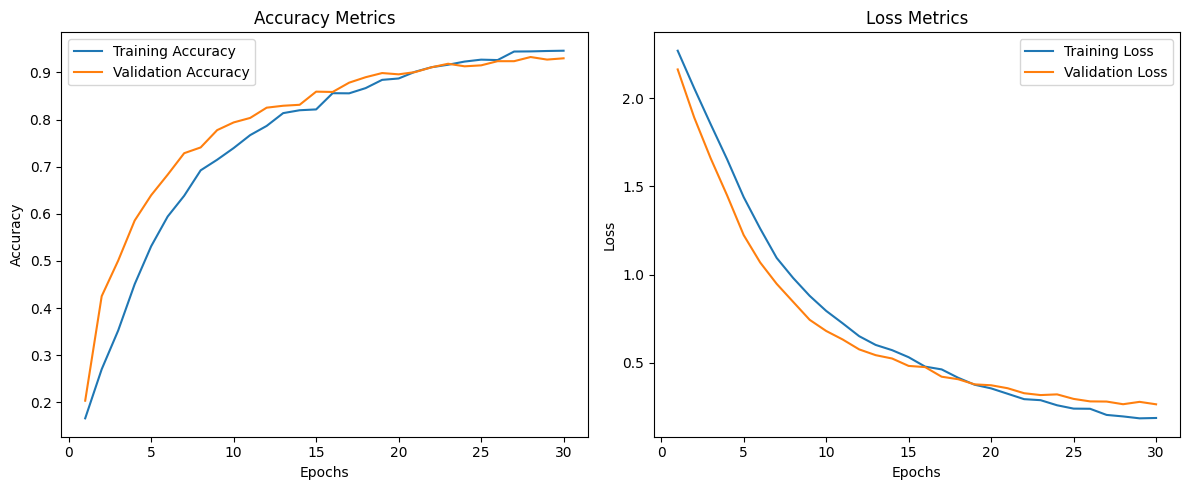

In [ ]:
def build_model_MAC():
    # THE CNN MODEL
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (RESIZE_VALUE,RESIZE_VALUE,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))



    model.add(Flatten())

    model.add(Dense(450))
    model.add(Activation('relu'))
    model.add(Dropout(.65))

    model.add(Dense(len(aircraft_types)))
    model.add(Activation("softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=opt,
                    metrics=['acc'])

    return model

model = build_model_MAC()
epochs = 30
x = np.arange(epochs) + 1
history_ = model.fit(x_train, y_train, epochs=epochs, validation_split=0.3, batch_size=64)

# Evaluate the model on the test set
test_loss_, test_acc_ = model.evaluate(x_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_acc_:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, history_.history['acc'])
plt.plot(x, history_.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy Metrics")

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(x, history_.history['loss'])
plt.plot(x, history_.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss Metrics")

plt.tight_layout()
plt.show()



In [ ]:
# model.save(root_path+"Model_1") # If one wants to save the model

In [ ]:
# To predict the class of an image
from keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model

# Load the image and preprocess it
img_path = '/content/drive/MyDrive/aircraft_image_dataset/E-3/9-103.jpg' # Change File Path
img = keras_image.load_img(img_path, target_size=(RESIZE_VALUE, RESIZE_VALUE))
img_array = keras_image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand dimensions to match the model input shape (if necessary)
img_input = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_input)
predicted_class_index = np.argmax(predictions)
predicted_class = aircraft_types[predicted_class_index]

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 216ms/step
Predicted Class: E-3


In [ ]:
# Pruning of the model

!pip install tensorflow_model_optimization

import tensorflow_model_optimization as tfmot

# Define a pruning schedule (adjust as needed)
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,  # Pruning 50% of the weights
    begin_step=0,
    end_step=1000
)

# Create a pruning callback
pruning_callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='/tmp')
]

# Define the model for pruning
pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, pruning_schedule=pruning_schedule)

# Compile the pruned model with appropriate optimizer and loss function
pruned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prune the model by training for a few epochs (adjust epochs and other parameters)
pruned_model.fit(x_train, y_train, epochs=20, callbacks=pruning_callbacks)


  Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl (241 kB)
Epoch 1/20
  4/154 [..............................] - ETA: 3s - loss: 4.1187 - accuracy: 0.5156   

154/154 [==============================] - 17s 48ms/step - loss: 1.1316 - accuracy: 0.6586
Epoch 2/20
154/154 [==============================] - 4s 23ms/step - loss: 0.5475 - accuracy: 0.8203
Epoch 3/20
154/154 [==============================] - 4s 26ms/step - loss: 0.3665 - accuracy: 0.8763
Epoch 4/20
154/154 [==============================] - 3s 21ms/step - loss: 0.2699 - accuracy: 0.9108
Epoch 5/20
154/154 [==============================] - 3s 20ms/step - loss: 0.2037 - accuracy: 0.9365
Epoch 6/20
154/154 [==============================] - 3s 20ms/step - loss: 0.1554 - accuracy: 0.9553
Epoch 7/20
154/154 [==============================] - 4s 25ms/step - loss: 0.1161 - accuracy: 0.9624
Epoch 8/20
154/154 [==============================] - 5s 30ms/step - loss: 0.0898 - accuracy: 0.9698
Epoch 9/20
154/154 [==============================] - 3s 20ms/step - loss: 0.1006 - accuracy: 0.9682
Epoch 10/20
154/154 [==============================] - 3s 20ms/step - loss: 0.0808 - accuracy: 0.9753

In [ ]:
# Testing data accuracy of pruned model
test_loss_, test_acc_ = pruned_model.evaluate(x_test, y_test, verbose=0)
print(test_acc_)

0.9714285731315613


In [ ]:
#code to augment the images in the data set, to make the cnn model work better
'''
def image_process():
  #image processing (dataset image randomizer)
  plane = "c/"
  datagen = ImageDataGenerator(
          rotation_range=360,
          width_shift_range=0,
          height_shift_range=0,
          shear_range=0,
          zoom_range=0.0,
          horizontal_flip=True,
          fill_mode='nearest')

  selected_path = root_path+plane
  for img_ in os.listdir(selected_path):
    img = load_img(selected_path+img_)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=root_path+plane, save_prefix=img_, save_format='jpeg'):
        i += 1
        if i > 20: # the number of image generation (amendments) per selected picture
            break
image_process()
'''

# **DenseNet Model: Neural Network Implementation 2**

In [ ]:
import tensorflow as tf
import tensorflow.keras.losses as losses
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras.optimizers as optimizers
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
LOG_DIR = f"{int(time.time())}"
from keras.layers import BatchNormalization
from tempfile import TemporaryFile
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.regularizers as regularizers
import cv2
import random
from PIL import Image
import matplotlib.patches as patches
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from google.colab import drive
import time

<ipython-input-1-1f9d64ee58dd>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
from google.colab import drive
import time
drive.mount('/content/drive/')
dataset_dir = "/content/drive/MyDrive/aircraft_image_dataset" # Change file path

training_data = []
test_data = []
RESIZE_VALUE = 130
root_path = "/content/drive/MyDrive/aircraft_image_dataset/" # Change file path

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# outputs the names of the files currently in the google drive file (dataset)
types_path = "/content/drive/MyDrive/aircraft_image_dataset/TYPE-NAMES.txt"
aircraft_types = []
f = open(types_path, "r")
for types in f.read().split():
  aircraft_types.append(types.replace('"',''))
print(len(aircraft_types))
f.close()
print("Selected aircraft files:",aircraft_types)
print("Files in dataset (Google drive):",os.listdir(root_path))

10
Selected aircraft files: ['B-1', 'B-2', 'B-52', 'C-5', 'C-17', 'C-130', 'C-135', 'E-3', 'KC-10', 'BareLand']
Files in dataset (Google drive): ['BareLand', 'sample', 'training_dataset.npz', 'Model V5', 'B-1', 'B-2', 'B-52', 'C-5', 'C-17', 'C-130', 'C-135', 'E-3', 'KC-10', 'TYPE-NAMES.txt', 'Model V6', 'Model V4', 'Model V3', 'Model V2', 'Model V1', 'Testing Images', 'R - CNN DATASETS', 'primary_training_dataset.npz']


In [ ]:
def load_training_data():
  #LOAD TRAINING DATA INTO ARRAY FROM FILE
  loaded = np.load(root_path+"training_dataset.npz", allow_pickle=True) # Change file path
  training_data = loaded['a']
  for x in range(len(training_data)):
    if (training_data[x][0].shape[2] == 4):
      training_data[x][0] = cv2.cvtColor(training_data[x][0], cv2.COLOR_BGRA2BGR)
  return training_data
training_data = load_training_data()
random.shuffle(training_data)
print(len(training_data))


6123
3


In [ ]:
x_train = []
y_train = []

for data, label in training_data:
  x_train.append(data)
  y_train.append(label)

x_train = np.asarray(x_train)
x_train = np.array(x_train).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
y_train = np.asarray(y_train)

print(len(x_train))


6123


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))


Training samples: 4898
Testing samples: 1225


In [ ]:
# The DenseNet Model
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt


def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(130, 130, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)



In [ ]:
# Define parameters
num_classes = 10
dense_blocks = 3  # Number of dense blocks in DenseNet
layers_per_block = 4  # Number of layers in each dense block
growth_rate = 12  # Growth rate controls how many filters each layer adds
initial_filters = 24  # Number of filters in the initial convolution layer

# Create the DenseNet model
model_2 = dense_net(initial_filters, growth_rate, num_classes, dense_blocks, layers_per_block)

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.3)

# Evaluate the model
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/20
54/54 [==============================] - 41s 230ms/step - loss: 1.7104 - accuracy: 0.4513 - val_loss: 3.0410 - val_accuracy: 0.1075
Epoch 2/20
54/54 [==============================] - 8s 156ms/step - loss: 1.2103 - accuracy: 0.6319 - val_loss: 4.6427 - val_accuracy: 0.1238
Epoch 3/20
54/54 [==============================] - 9s 171ms/step - loss: 0.9715 - accuracy: 0.7130 - val_loss: 5.6972 - val_accuracy: 0.1401
Epoch 4/20
54/54 [==============================] - 9s 169ms/step - loss: 0.8183 - accuracy: 0.7590 - val_loss: 4.0232 - val_accuracy: 0.1503
Epoch 5/20
54/54 [==============================] - 9s 158ms/step - loss: 0.6884 - accuracy: 0.8019 - val_loss: 4.3900 - val_accuracy: 0.1850
Epoch 6/20
54/54 [==============================] - 9s 168ms/step - loss: 0.5914 - accuracy: 0.8293 - val_loss: 3.1506 - val_accuracy: 0.3558
Epoch 7/20
54/54 [==============================] - 8s 156ms/step - loss: 0.5020 - accuracy: 0.8568 - val_loss: 2.4374 - val_accuracy: 0.4347
Epoch

In [ ]:
#model_2.save('/content/drive/MyDrive/'+"Dense_Net_acc.keras")

In [ ]:
from keras.utils import plot_model
from IPython.display import Image, display

#model_2 = keras.models.load_model('/content/drive/MyDrive/'+"Dense_Net.keras")
#plot_model(model_2, show_shapes=True, show_layer_names=True, to_file='model.png')
print(model_2.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 130, 130, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 130, 130, 24)         648       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 130, 130, 24)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 65, 65, 24)           0         ['activation[0][0]']          
 D)                                                                                           

In [ ]:
#Prediting using model

from keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model


# Load the image and preprocess it
img_path = '/content/drive/MyDrive/aircraft_image_dataset/E-3/9-103.jpg' #loading an image of E-3 aircraft
img = keras_image.load_img(img_path, target_size=(RESIZE_VALUE, RESIZE_VALUE))
img_array = keras_image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image

# Expand dimensions to match the model input shape (if necessary)
img_input = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model_2.predict(img_input)
predicted_class_index = np.argmax(predictions)
predicted_class = aircraft_types[predicted_class_index]

print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 683ms/step
Predicted Class: E-3


In [ ]:
# Pruning the model
!pip install tensorflow-model-optimization
import tensorflow_model_optimization as tfmot

# Define a pruning schedule (adjust as needed)
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.0,
    final_sparsity=0.5,  # Pruning 50% of the weights
    begin_step=0,
    end_step=1000
)

# Create a pruning callback
pruning_callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='/tmp')
]

# Define the model for pruning
pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model_2, pruning_schedule=pruning_schedule)

# Compile the pruned model with appropriate optimizer and loss function
pruned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prune the model by training for a few epochs (adjust epochs and other parameters)
pruned_model.fit(x_train, y_train, epochs=2, callbacks=pruning_callbacks)

Epoch 1/2
  6/154 [>.............................] - ETA: 13s - loss: 0.2561 - accuracy: 0.9062

154/154 [==============================] - 49s 137ms/step - loss: 0.2409 - accuracy: 0.9279
Epoch 2/2
154/154 [==============================] - 15s 94ms/step - loss: 0.2821 - accuracy: 0.9187


In [ ]:
test_loss, test_accuracy = pruned_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

39/39 [==============================] - 1s 23ms/step - loss: 7.2177 - accuracy: 0.2547
Test accuracy: 0.254693865776062
